# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.

Выполнила студентка гр. 3385 Дорогушина Анастасия Александровна. Вариант №4.

## Цель работы

Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.



## Основные теоретические положения

### Основные определения

#### Актор
Актор (actor) - базовый элемент сети, представляющий отдельную единицу, (не обязательно) участвующую во взаимодействиях.

#### Реляционная связь
Реляционная связь (relational tie) - отношение/взаимодействие/ассоциация между двумя акторами в сети.

#### Граф
Граф (graph) - модель социальной сети с ненаправленным дихотомическим отношением $G = G(N,L)$, где:
- $N = {n_1,...,n_g}$ - набор акторов;
- $L = {l_1,...,l_L}$, $l_k = (n_i,n_j)$ - набор ребер.

#### Социоматрица
Социоматрица (sociomatrix) - матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети ($g$ - количество акторов в сети). $X = x_{ij}, 1 \le i,j \le g$, т.ч.
- на диагонали $x_{ii} = -$;
- в остальных  $x_{ij} = 0$ или  $x_{ij} = 1$.

#### Размер сети
Резмер сети (network size) - количество акторов в сети.

#### Плотность сети
Плотность сети (network density) - доля имеющихся связей по отношению к максимально возможному количеству связей:

$$den(G) = \frac{2L}{g(g-1)} = \frac{L}{\binom{g}{2}}$$

#### Компонента связности
Компонента связности (component) - подгруппа, в которой все акторы связаны друг с другом.

#### Диаметр сети
Диаметр сети (network diameter) - максимальное расстояние между 2 узлами в сети:
$$diam(G) = \max d(n_i,n_j)$$

- $d_{ij}$ - длина кратчайшего пути между вершинами $i$ и $j$.

#### Двудольные сети
Двудольный граф (bipartite graph) - сеть $G = (V, E)$, где $V = V_1 \cup V_2$, $V_1 \cap V_2 = \emptyset$, и все рёбра $e \in E$ соединяют вершины из разных множеств:
$$
E \subseteq \{(u,v) | u \in V_1, v \in V_2\}
$$


#### Гиперграф
Обобщение графа, в котором каждым ребером могут соединяться не два узла, а подмножества

$$
H = H(A, B)$$ где
- $A$ - набор вершин
- $B$ - набор гипер ребер

#### Матрицы
- Матрица совместного участия акторов $X_N = A A^T$
- Матрица перекрытия событий $X_M = A^T A$

#### K-ядра
$k$-ядро ($k$-core) - максимальный подграф, в котором каждый узел смежен не менее чем с k узлами в подграфе:
$$\deg(v) \geq k, ∀ v \in V$$


#### Отношение шансов
Пусть $kl$ - количество акторов, которые участвуют в $k$ и $l$ событиях.
Аналогично $k$ и $l$.
$0$ - количество акторов, не участвующих в событиях

Тогда отношение шансов и его логарифм:
- $O_kl = \frac{kl \cdot 0}{k \cdot l}$
- $ln(O_kl)$

### Меры центральности

#### Центральность по степени

$$C_D(n_i) = deg(n_i)$$

Нормированная центральность по степени:

$$C_D'(n_i) = \frac{deg(n_i)}{g - 1}$$

#### Центральность по близости
$$C_C(n_i) = \frac{1}{\sum_{j = 1}^{g} d(n_i,n_j)}$$

Нормированная центральность по близости:

$$C_C'(n_i) = (g-1)C_C(n_i)$$

#### Центральность по посредничеству
$$C_B(n_i) = \sum_{j < k} \frac{\sigma_{jk}(n_i)}{\sigma_{jk}}$$

- $\sigma_{jk}$ - количество кратчайших путей между $j$ и $k$
- $\sigma_{jk}(n_i)$ - количество таких путей, содержащих $n_i

Нормированная центральность по посредничеству:

$$C_B'(n_i) =\frac{2 C_B(n_i)}{(g-1)(g-2)} = \frac{C_B(n_i)}{\binom{g-1}{2}}$$

#### Центральность по информации

Алгоритм нахождения:
1) Вычислить матрицу псевдосмежности $A = 1 + K$, где $K$ - матрица Кирхгофа $g \times g$
2) Вычислить обратную матрицу $A^{-1} = C$
3) $T = Tr(C)$, $R = \sum_{j = 1}^{g} c_{ij}$

Тогда центральность по информации:

$$C_I(n_i) = \frac{1}{c_{ii} + (T-2R)/g}$$

Нормированная центральность по информации:

$$C_I'(n_i) = \frac{C_I(n_i)}{\sum_{j = 1}^{g} C_I(n_j)}$$

### Групповые характеристики сетей
$C_A(n^*) = max_iC_A(n_i)$
#### Централизация по степени
$$
C_D = \frac{\sum_{i=1}^g [C_D(n^*) - C_D(n_i)]}{(g-1)(g-2)}
$$

#### Централизация по близости
$$
C_C = \frac{\sum_{i=1}^g [C'_C(n^*) - C'_C(n_i)]}{[(g-2)(g-1)]/(2g-3)}
$$

#### Централизация по посредничеству
$$
C_B = \frac{2 \sum_{i=1}^g [C'_B(n^*) - C'_B(n_i)]}{(g-2)(g-1)^2}
$$

## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.


## Выполнение работы

###1. Извлечение социоматрицы

In [189]:
# сначала добавление нужных библиотек
if (!require(statnet)) install.packages("statnet", repos = "https://cloud.r-project.org/")
if (!require(igraph)) install.packages("igraph", repos = "https://cloud.r-project.org/")

In [190]:
library(statnet)
library(igraph)

Социоматрица с именами:

              Acciaiuoli  Albizzi  Barbadori  Bischeri  Castellani  Ginori
Acciaiuoli             0        0          0         0           0       0
 Albizzi               0        0          0         0           0       1
 Barbadori             0        0          0         0           1       0
 Bischeri              0        0          0         0           0       0
 Castellani            0        0          1         0           0       0
 Ginori                0        1          0         0           0       0
 Guadagni              0        1          0         1           0       0
 Lamberteschi          0        0          0         0           0       0
 Medici                1        1          1         0           0       0
 Pazzi                 0        0          0         0           0       0
 Peruzzi               0        0          0         1           1       0
 Pucci                 0        0          0         0           0       0


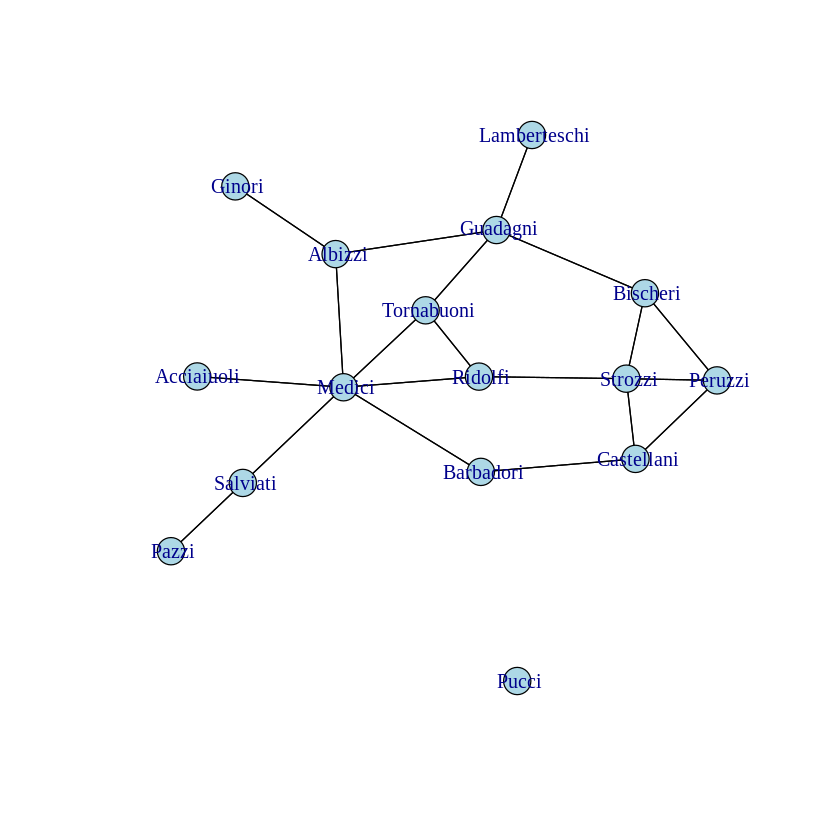

In [191]:
# извлечение социоматрицы из файла

# florentine_marital.csv
link <- "https://drive.google.com/uc?export=download&id=13LxnbmPxmA-4WJTUK55hkCTYAZ9CtZUv"

# (ссылка, пропуск первой строки с именами, пропуск комментариев, разделитель столбцов, запрет изменения текстовых столбцов)
data <- read.csv(link, header = FALSE, comment = "#", sep = ",", stringsAsFactors = FALSE)

# матрица без первой строки
temp_matrix <- data[-1, ]

# социоматрица
sociomatrix <- matrix(as.numeric(unlist(temp_matrix)), nrow = nrow(temp_matrix), ncol = ncol(temp_matrix))

# присвоение имен
rownames(sociomatrix) <- data[1, ]
colnames(sociomatrix) <- data[1, ]

net <- network(sociomatrix, matrix.type = "adjacency")
inet <- graph_from_adjacency_matrix(as.matrix(sociomatrix))

cat("Социоматрица с именами:\n\n")
print(sociomatrix)

plot(inet, layout = layout_with_fr, vertex.size = 10, vertex.color = "lightblue",
     edge.color = "black", edge.arrow.mode = 0)

###2. Точки сочленения и мосты

In [192]:
detach("package:igraph", unload = TRUE)

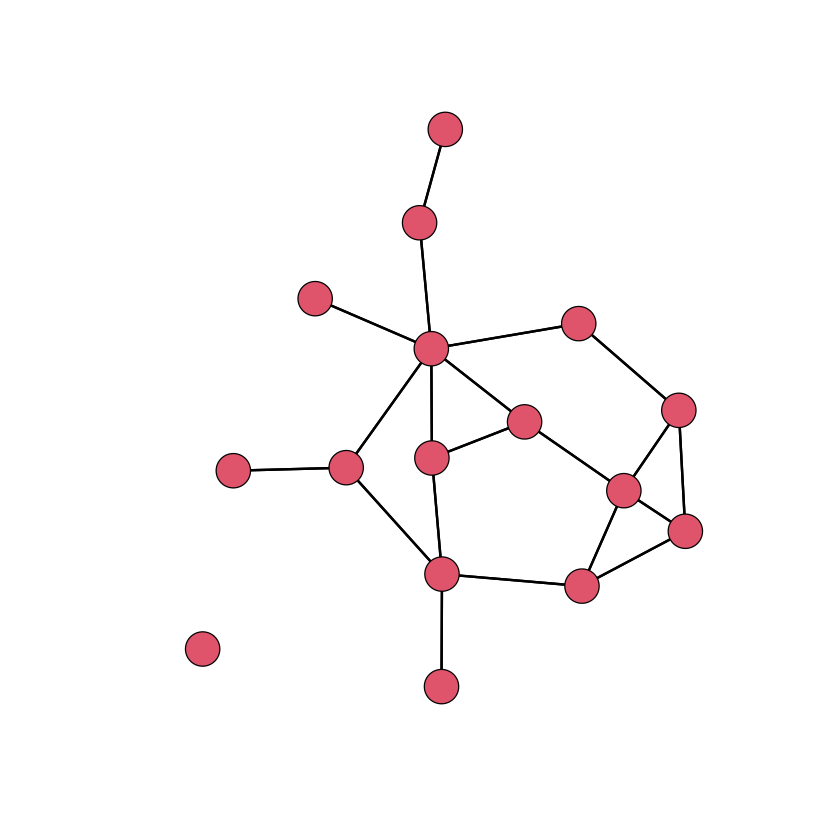

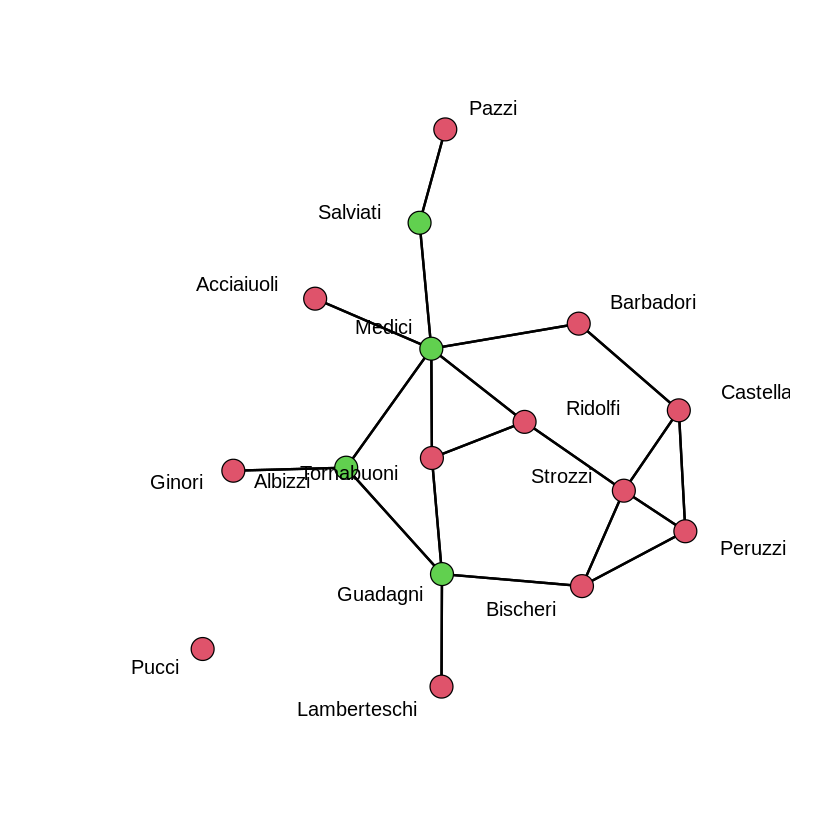

In [193]:
## CUTPOINTS
cpnet <- cutpoints(net,mode="graph", return.indicator=TRUE)
mycoord <- gplot(net,gmode="graph", vertex.cex=1.5)
gplot(net, gmode="graph", vertex.col=cpnet+2, coord=mycoord, jitter=FALSE,
      displaylabels=TRUE)

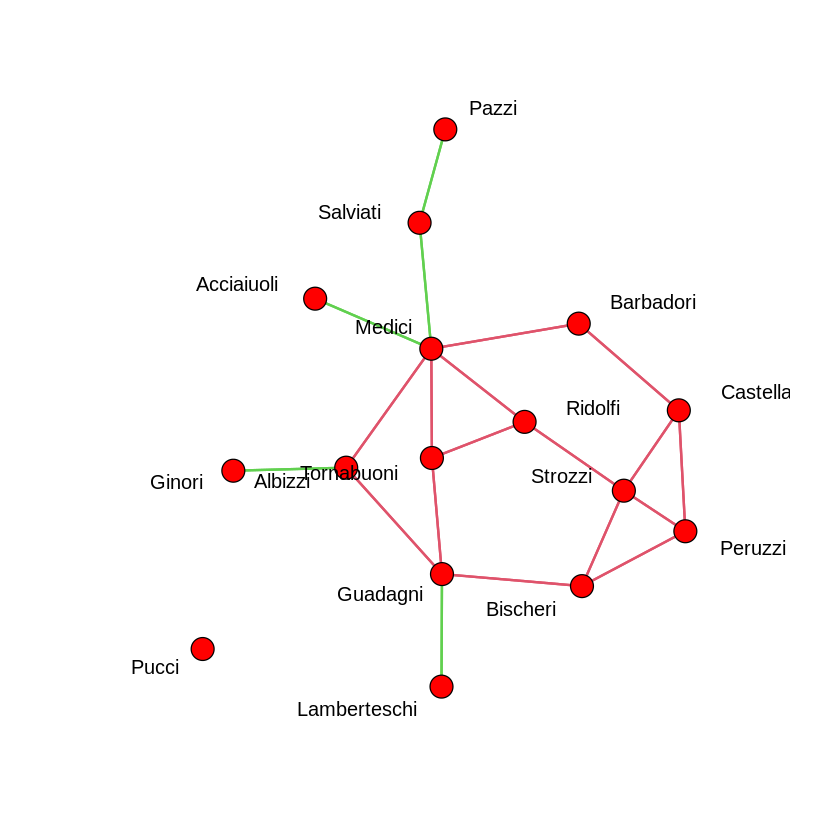

In [194]:
## BRIDGES
bridges <- function(dat,mode="graph", connected=c("strong", "weak")) {
  e_cnt <- network.edgecount(dat)
  if (mode == "graph") {
    cmp_cnt <- components(dat)
    b_vec <- rep(FALSE,e_cnt)
    for(i in 1:e_cnt){
      dat2 <- dat
      delete.edges(dat2,i)
      b_vec[i] <- (components(dat2) != cmp_cnt)
    }
  }
  else {
    cmp_cnt <- components(dat,connected=connected)
    b_vec <- rep(FALSE,e_cnt)
    for(i in 1:e_cnt){
      dat2 <- dat
      delete.edges(dat2,i)
      b_vec[i] <- (components(dat2,connected=connected)
                   != cmp_cnt)
    }
  }
  return(b_vec)
}

brnet <- bridges(net)
gplot(net,gmode="graph",vertex.col="red", edge.col=brnet+2, coord=mycoord,
      jitter=FALSE, displaylabels=TRUE)

###3. Значения централизации для каждой меры

In [195]:
# убираем изолированную вершину Pucci
inet2 <- net
isolated_vert <- which(degree(net, gmode = "graph") == 0)
delete.vertices(inet2, isolated_vert)
g <- network.size(inet2)

degree_c <- centralization(inet2, degree, mode = "graph")
closeness_c <- centralization(inet2, closeness, mode = "graph")
betweenness_c <- centralization(inet2, betweenness, mode = "graph")

c_d <- degree(inet2, gmode = "graph")
C_D <- sum(max(c_d) - c_d) / ((g-1)*(g-2))
c_c <- closeness(inet2, gmode = "graph")
C_C <- sum(max(c_c) - c_c) / ((g-1)*(g-2) / (2*g-3))
c_b <- betweenness(inet2, gmode = "graph")
C_B <- 2 * sum(max(c_b) - c_b) / ((g-1)*(g-1)*(g-2))

data.frame(
  centr = c("degree", "closeness", "betweenness"),
  func = c(degree_c, closeness_c, betweenness_c),
  calc = c(C_D, C_C, C_B)
)

centr,func,calc
<chr>,<dbl>,<dbl>
degree,0.2747253,0.2747253
closeness,0.3224523,0.3224523
betweenness,0.4368132,0.4368132


In [196]:
# Выводы:
## Все значения > 20% - сеть имеет заметную централизацию, но не очень высокую
# Degree centrality 27,5% - самая низкая среди них:
## Связи распределены относительно равномерно, нет ярко выраженных акторов
## с огромным количеством связей
# Closeness centrality 32%:
## Есть некоторые вершины, которые ближе ко всем остальным
## Но не настолько, чтобы быть уникальными центрами доступности
# Betweenness centrality 44% - самая высокая среди них:
## Несколько ключевых мостов могут контролировать потоки

###4. Исследование сети на предмет подгрупп с помощью 𝑘-ядер

In [197]:
if (!require(intergraph)) install.packages("intergraph", repos = "https://cloud.r-project.org/")
library(intergraph)
library(igraph)


Attaching package: ‘igraph’


The following object is masked _by_ ‘.GlobalEnv’:

    bridges


The following objects are masked from ‘package:sna’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census


The following objects are masked from ‘package:network’:

    %c%, %s%, add.edges, add.vertices, delete.edges, delete.vertices,
    get.edge.attribute, get.edges, get.vertex.attribute, is.bipartite,
    is.directed, list.edge.attributes, list.vertex.attributes,
    set.edge.attribute, set.vertex.attribute


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




coreness
 0  1  2 
 1  5 10 

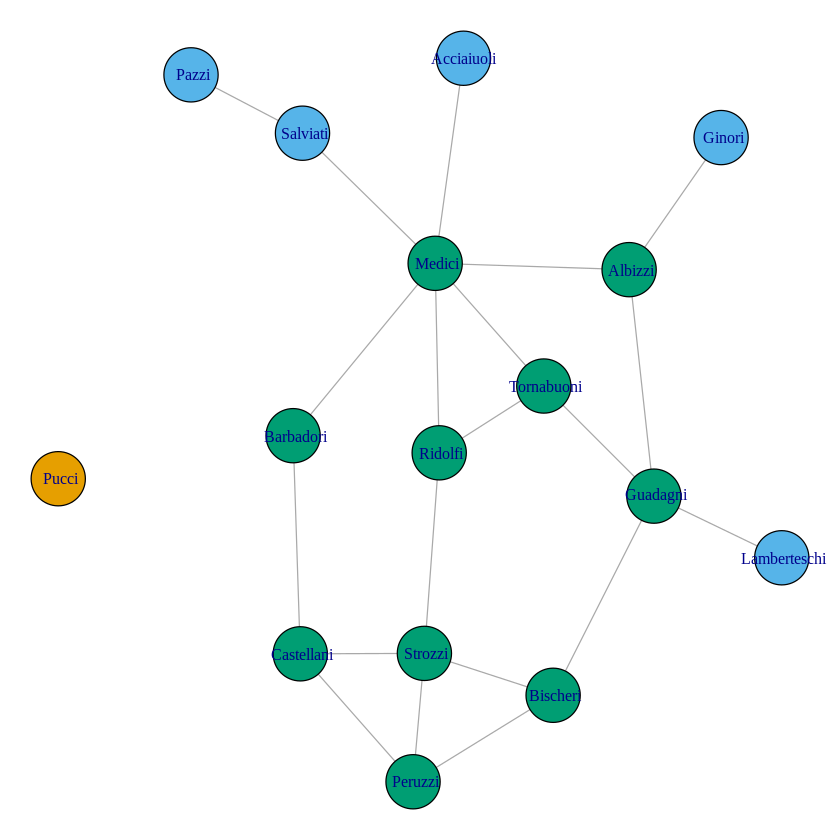

In [198]:
## K-CORES
inet_undirected <- as.undirected(inet, mode = "collapse")
coreness <- coreness(inet_undirected)
table(coreness)
maxCoreness <- max(coreness)

V(inet_undirected)$name <- colnames(sociomatrix)
V(inet_undirected)$color <- coreness+1
op <- par(mar = rep(0, 4))
plot(inet_undirected, vertex.label.cex=0.8)
par(op)

colors <- rainbow(maxCoreness+10)

V(inet_undirected)$name <- coreness
V(inet_undirected)$color <- colors[coreness+6]

inet1_2 <- induced_subgraph(inet_undirected, vids=which(coreness > 0))
inet2_2 <- induced_subgraph(inet_undirected, vids=which(coreness > 1))

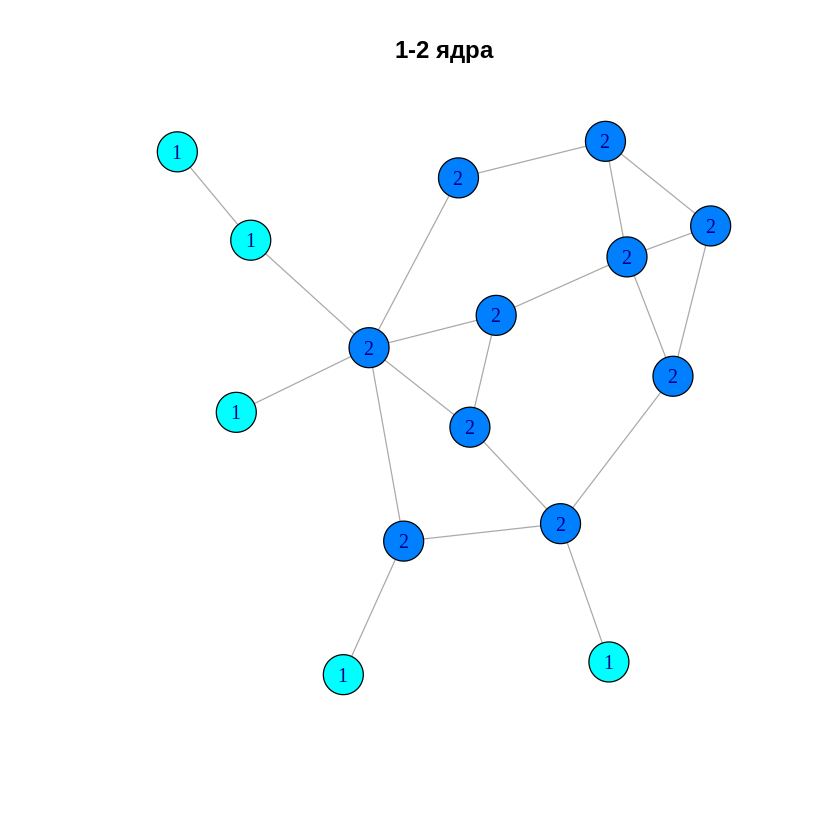

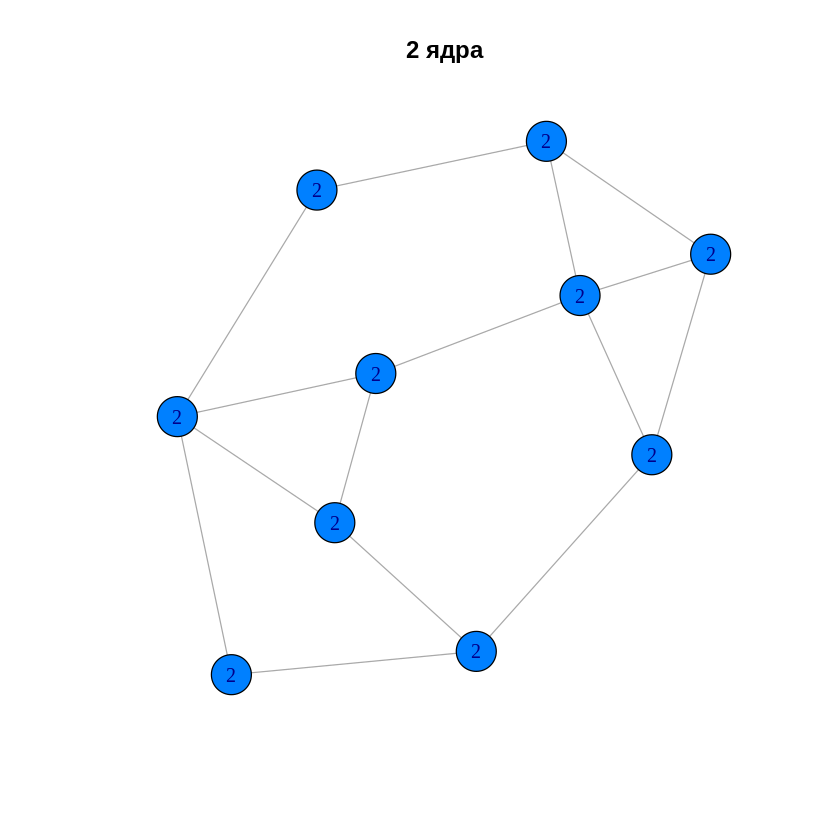

In [199]:
lay <- layout.fruchterman.reingold(inet)
plot(inet1_2, layout=lay[which(coreness > 0),], main="1-2 ядра")
plot(inet2_2, layout=lay[which(coreness > 1),], main="2 ядра")
par(op)

In [200]:
# Выводы:
## В сети есть одно 0-ядро - изолированная вершина
## Пять 1-ядер и десять 2-ядер

###5. Обнаружение сообществ - вариант 1

####Edge-betweenness

Суть: Алгоритм иерархический, разделяющий. Он последовательно удаляет ребра с наибольшим показателем реберного посредничества — количеством кратчайших путей между всеми парами вершин, проходящих через данное ребро. Предполагается, что такие ребра являются мостами между плотно связанными сообществами. Удаление продолжается до тех пор, пока граф не распадется на отдельные компоненты, что формирует дендрограмму разбиения.


####Leading Eigenvector

Суть: Алгоритм основан на спектральном разложении (анализе собственных значений и векторов) модулярной матрицы графа. Разбиение на два сообщества определяется знаком элементов ведущего собственного вектора этой матрицы (связанного с наибольшим положительным собственным значением). Для получения большего числа сообществ процесс рекурсивно применяется к полученным подграфам.


####Fast-greedy

Суть: Алгоритм иерархический, объединяющий. Изначально каждая вершина — отдельное сообщество. На каждом шаге алгоритм объединяет две группы сообществ, дающие максимальное увеличение модулярности. Процесс продолжается до тех пор, пока дальнейшее объединение не начнет уменьшать модулярность.

1. Алгоритм Edge-betweenness
Количество обнаруженных сообществ: 4 
Модулярность: 0.3975 
Размеры сообществ: 4 4 5 2 

2. Алгоритм Leading Eigenvector
Количество обнаруженных сообществ: 3 
Модулярность: 0.36375 
Размеры сообществ: 6 4 5 

3. Алгоритм Fast-greedy
Количество обнаруженных сообществ: 3 
Модулярность: 0.39875 
Размеры сообществ: 6 4 5 



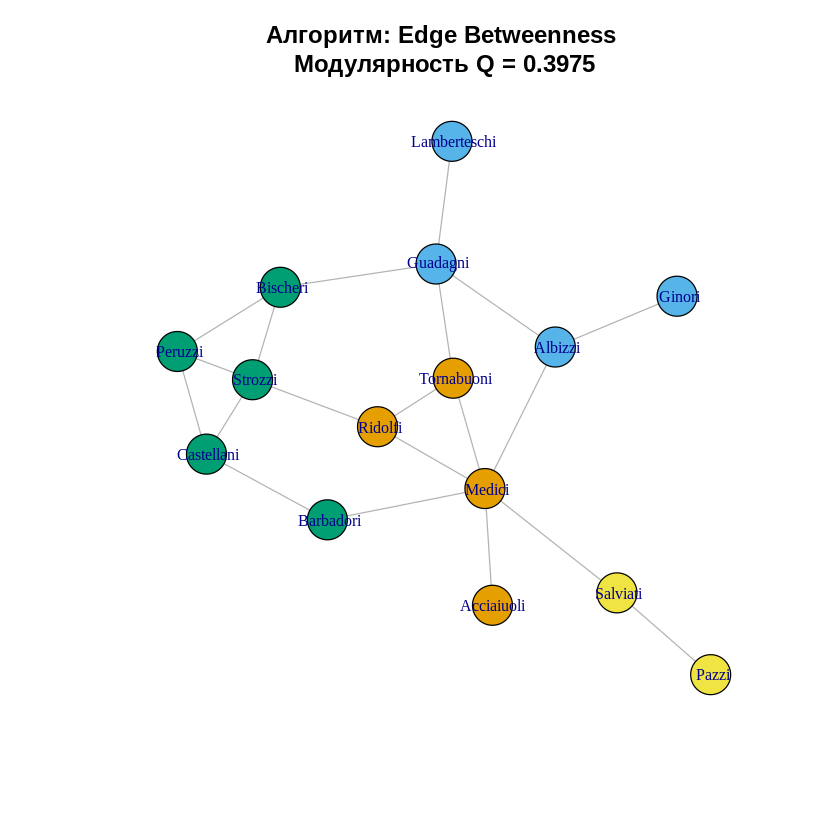

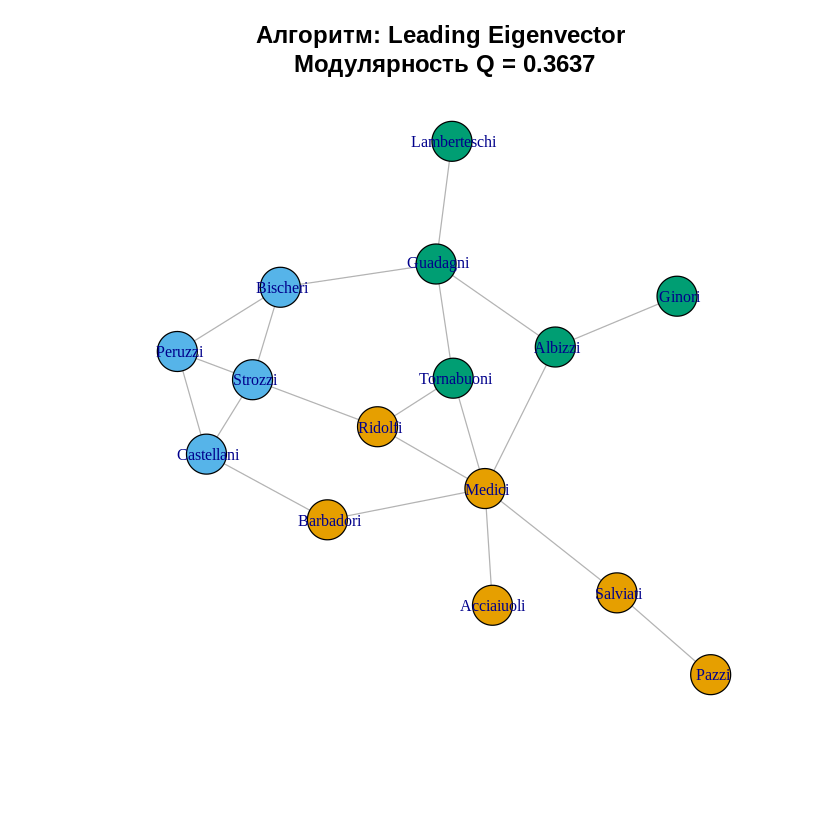

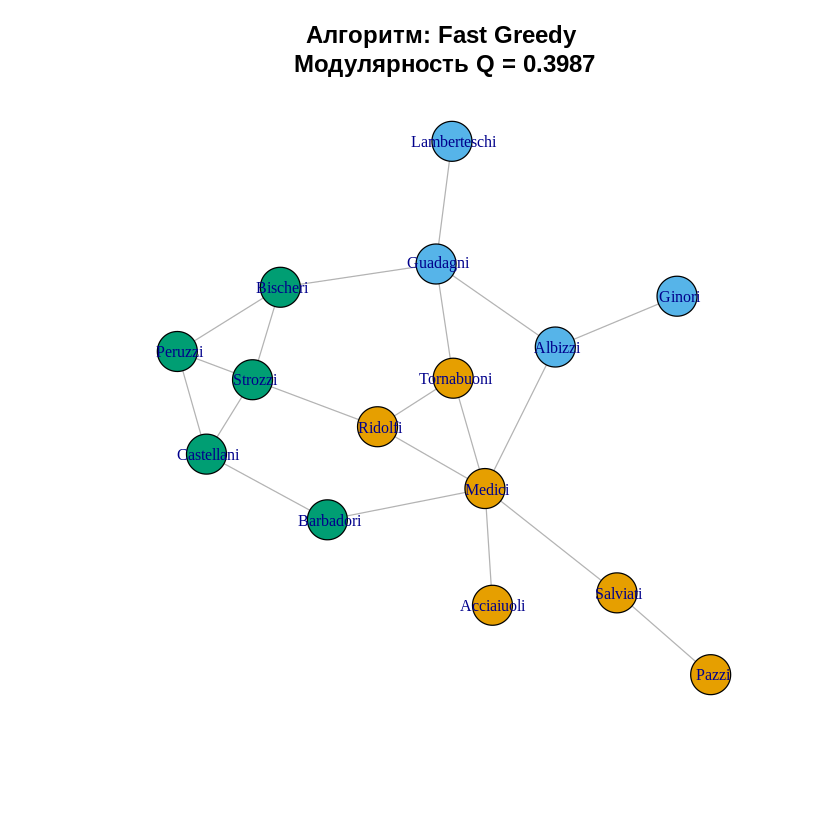

In [201]:
# убираем изолированную вершину Pucci
inet_for_communities <- delete_vertices(inet, which(degree(inet) == 0))

# неориентированный граф
inet_undirected <- as.undirected(inet_for_communities, mode = "collapse")

cat("1. Алгоритм Edge-betweenness\n")
comm_eb <- cluster_edge_betweenness(inet_undirected)
cat("Количество обнаруженных сообществ:", length(comm_eb), "\n")
cat("Модулярность:", modularity(comm_eb), "\n")
cat("Размеры сообществ:", sizes(comm_eb), "\n\n")

cat("2. Алгоритм Leading Eigenvector\n")
comm_le <- cluster_leading_eigen(inet_undirected)
cat("Количество обнаруженных сообществ:", length(comm_le), "\n")
cat("Модулярность:", modularity(comm_le), "\n")
cat("Размеры сообществ:", sizes(comm_le), "\n\n")

cat("3. Алгоритм Fast-greedy\n")
comm_fg <- cluster_fast_greedy(inet_undirected)
cat("Количество обнаруженных сообществ:", length(comm_fg), "\n")
cat("Модулярность:", modularity(comm_fg), "\n")
cat("Размеры сообществ:", sizes(comm_fg), "\n\n")

plot_communities(inet_undirected, comm_eb, "Edge Betweenness")
plot_communities(inet_undirected, comm_le, "Leading Eigenvector")
plot_communities(inet_undirected, comm_fg, "Fast Greedy")

In [202]:
# Выводы:
## Лучший алгоритм по модулярности Fast-greedy (0.39875)
## В сети присутствуют 3 устойчивых сообщества размером 6, 4 и 5 акторов
## Существует малая, тесно связанная группа (2 актора), которую выделяет отдельно
## только алгоритм Edge-betweenness

###6. Извлечение из файла ceo.csv матрицы инцидентности

In [203]:
# ceo.csv
link <- "https://drive.google.com/uc?export=download&id=1PoIf2jyNfp0eT_1_FZLLWs2RSs_ZDzkQ"

# (ссылка, пропуск первой строки с именами, пропуск комментариев, разделитель столбцов, запрет изменения текстовых столбцов)
data <- read.csv(link, header = FALSE, comment = "#", sep = ",", stringsAsFactors = FALSE)

# социоматрица
soc_matrix <- matrix(as.numeric(unlist(data)), nrow = nrow(data), ncol = ncol(data))
print(soc_matrix)

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,]    0    0    1    1    0    0    0    0    1     0     0     0     0
 [2,]    0    0    1    0    1    0    1    0    0     0     0     0     0
 [3,]    0    0    1    0    0    0    0    0    0     0     0     1     0
 [4,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [5,]    0    0    1    0    0    0    0    0    0     0     0     0     1
 [6,]    0    1    1    0    0    0    0    0    0     0     0     0     0
 [7,]    0    0    1    1    0    0    0    0    0     1     1     0     0
 [8,]    0    0    0    1    0    0    1    0    0     1     0     0     0
 [9,]    1    0    0    1    0    0    0    1    0     1     0     0     0
[10,]    0    0    1    0    0    0    0    0    1     0     0     0     0
[11,]    0    1    1    0    0    0    0    0    1     0     0     0     0
[12,]    0    0    0    1    0    0    1    0    0     0     0     0     0
[13,]    0    0    1    1

###7. Сеть в виде биграфа

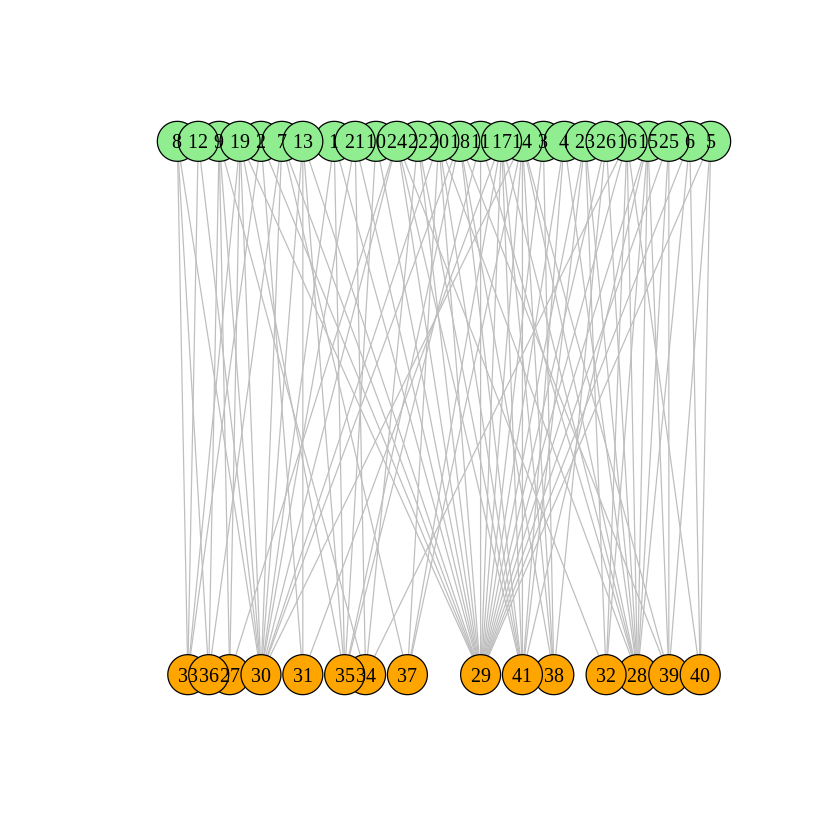

In [204]:
soc_graph <- graph_from_biadjacency_matrix(soc_matrix)
lay <- layout_as_bipartite(soc_graph)

plot(soc_graph, layout = lay,
     vertex.color = ifelse(V(soc_graph)$type, "orange", "lightgreen"),
     vertex.label.color = "black", edge.color = "gray")

###8. Сеть в виде гиперграфа

###9. Сеть аффилированности в виде двух одномодальных сетей

   1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
1  3 1 1 1 1 1 2 1 1  2  2  1  3  2  1  1  1  2  3  2  2  1  1  2  1  1
2  1 3 1 1 1 1 1 1 0  1  1  1  2  1  1  1  2  0  2  1  1  1  1  1  1  1
3  1 1 2 1 1 1 1 0 0  1  1  0  1  2  1  1  2  1  1  1  1  1  1  1  1  2
4  1 1 1 3 1 2 1 0 0  1  2  0  1  3  3  2  3  1  1  3  1  2  3  2  2  2
5  1 1 1 1 3 2 1 0 0  1  1  0  1  2  2  2  1  1  1  1  1  1  1  1  2  1
6  1 1 1 2 2 3 1 0 0  1  2  0  1  2  2  3  2  0  1  2  1  1  2  1  2  2
7  2 1 1 1 1 1 4 2 2  1  1  1  2  3  1  1  2  1  2  3  2  1  1  2  1  1
8  1 1 0 0 0 0 2 3 2  0  0  2  1  1  0  0  0  1  2  1  1  0  0  1  0  0
9  1 0 0 0 0 0 2 2 4  0  0  1  1  1  0  1  0  1  2  1  2  1  0  2  0  0
10 2 1 1 1 1 1 1 0 0  2  2  0  2  1  1  1  1  1  2  1  1  1  1  1  1  1
11 2 1 1 2 1 2 1 0 0  2  3  0  2  2  2  2  2  1  2  2  1  1  2  1  2  2
12 1 1 0 0 0 0 1 2 1  0  0  2  1  1  0  0  0  1  2  1  1  0  0  1  0  0
13 3 2 1 1 1 1 2 1 1  2  2  1  4  2  1  1  2  2  3  2  2  1  1  

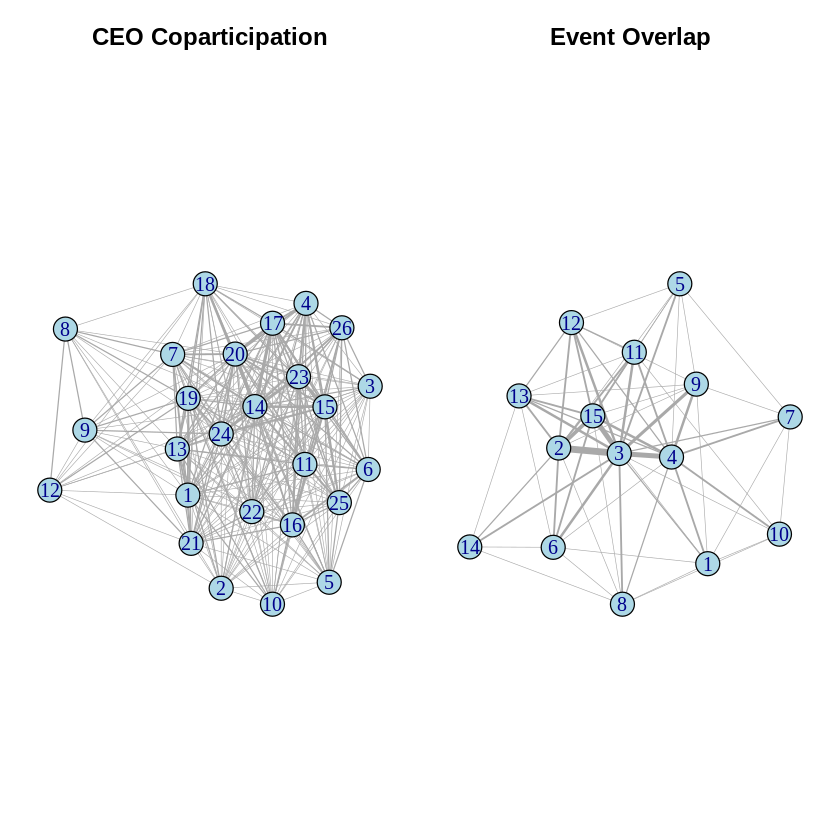

In [206]:
# матрица инцидентности
projection_results <- bipartite_projection(soc_graph)
incidence_matrix <- as_incidence_matrix(soc_graph, sparse = FALSE)

# сеть совместного участия
ceo_coparticipation <- incidence_matrix %*% t(incidence_matrix)
print(ceo_coparticipation)

# сеть перекрытия событий
event_overlap <- t(incidence_matrix) %*% incidence_matrix
print(event_overlap)

# визуализация
layout_config <- par(mfrow = c(1, 2), mar = c(1, 1, 3, 1))
plot(projection_results$proj1, edge.width = E(projection_results$proj1)$weight / 2,
     edge.color = "darkgray", vertex.color = "lightblue",
     main = "CEO Coparticipation")
plot(projection_results$proj2, edge.width = E(projection_results$proj2)$weight / 2,
     edge.color = "darkgray", vertex.color = "lightblue",
     main = "Event Overlap")
par(layout_config)

In [207]:
# Выводы:
## СЕО состоят друг с другом в клубах, это замечательно
## На главной диагонали первой матрицы - количество клубов, в которых состоит актор
## На главной диагонали второй - количество СЕО, которые состоят в клубе

###10. Степень участия для каждого актора, а также среднее количество событий

In [208]:
# степень участия
actor_participation <- diag(ceo_coparticipation)
names(actor_participation) <- 1:length(actor_participation)
cat("Степень участия каждого актора (количество событий):\n")
print(actor_participation)

# среднее количество событий на актора
mean_participation <- mean(actor_participation)
cat("Среднее количество событий на актора:", round(mean_participation, 3))

Степень участия каждого актора (количество событий):
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 3  3  2  3  3  3  4  3  4  2  3  2  4  7  5  5  6  5  5  5  3  3  4  5  3  3 
Среднее количество событий на актора: 3.769

In [209]:
# Выводы:
## Каждый СЕО состоит в среднем в 3-4 клубах
## СЕО 14-20 самые активные и состоят в 5-7 клубах

###11. Размер и средний размер для каждого события

In [210]:
# размер события
event_size <- diag(event_overlap)
names(event_size) <- 1:length(event_size)
cat("Размер для каждого события:\n")
print(event_size)

# средний размер
mean_size <- mean(event_size)
cat("Средний размер:", round(mean_size, 3))

Размер для каждого события:
 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 
 3 11 22 12  3  4  4  4  6  3  4  5  5  3  9 
Средний размер: 6.533

In [211]:
# Выводы:
## В каждом клубе в среднем 6-7 СЕО
## Стоит отметить, что в клубах 2-4 их больше всего

###12. Плотность для отношения совместного участия акторов и отношения перекрытия

In [212]:
ceo_network <- graph_from_adjacency_matrix(ceo_coparticipation, mode = "undirected",
                               weighted = TRUE, diag = FALSE)
density_ceo <- edge_density(ceo_network)
cat("Плотность сети совместного участия акторов:", round(density_ceo, 3))

event_network <- graph_from_adjacency_matrix(event_overlap, mode = "undirected",
                                 weighted = TRUE, diag = FALSE)
density_events <- edge_density(event_network)
cat("\nПлотность сети перекрытия событий:", round(density_events, 3))

Плотность сети совместного участия акторов: 0.874
Плотность сети перекрытия событий: 0.629

In [213]:
# Выводы:
## Плотность первой сети 87%, образуется почти полная сеть
## Значит почти все СЕО состоят хотя бы с еще одним в одном из клубов
## Плотность второй сети 63%, значит вероятность того, что
## СЕО будет в хотя бы одном клубе с одним из других СЕО примерно 2/3

###13. Диаметр сети аффилированности

In [214]:
diameter_ceo <- diameter(ceo_network)
cat("Диаметр сети совместного участия акторов:", diameter_ceo)

diameter_events <- diameter(event_network)
cat("\nДиаметр сети перекрытия событий:", diameter_events)

Диаметр сети совместного участия акторов: 2
Диаметр сети перекрытия событий: 4

###14. Отношение шансов

In [239]:
g_events <- ncol(soc_matrix)
result <- matrix(0, nrow = g_events, ncol = g_events)

for (i in 1:(g_events - 1)) {
  for (j in (i + 1):g_events) {
    kl <- sum(soc_matrix[, i] & soc_matrix[, j])
    k <- sum(soc_matrix[, i] & !soc_matrix[, j])
    l <- sum(soc_matrix[, j] & !soc_matrix[, i])
    o <- sum(!soc_matrix[, i] & !soc_matrix[, j])
    kl <- (kl * o) / (k * l)
    result[j, i] <- result[i, j] <- round(kl, 2)
    if (result[i, j]>4 && result[i, j]<10)
      cat("Шансы", i, "и", j, "событий:", round(kl, 2),"\n")
  }
}
cat("\n")
print(result)

Шансы 1 и 10 событий: 5.25 
Шансы 2 и 6 событий: 5.25 
Шансы 2 и 11 событий: 5.25 
Шансы 2 и 15 событий: 4.8 
Шансы 4 и 7 событий: 4.33 
Шансы 4 и 11 событий: 4.33 
Шансы 6 и 15 событий: 8 
Шансы 11 и 12 событий: 6.33 
Шансы 11 и 15 событий: 8 

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
 [1,] 0.00 0.00 0.30  Inf 0.00 3.33 3.33 3.33 1.80  5.25  0.00  0.00  0.00
 [2,] 0.00 0.00  Inf 0.11 0.65 5.25 0.00 0.40 0.20  0.00  5.25  2.44  2.44
 [3,] 0.30  Inf 0.00 0.00  Inf  Inf 0.10 0.47 0.88  0.05   Inf  0.67  0.67
 [4,]  Inf 0.11 0.00 0.00 0.55 0.33 4.33 1.20 3.00   Inf  4.33  0.73  0.73
 [5,] 0.00 0.65  Inf 0.55 0.00 0.00 3.33 0.00 1.80  0.00  3.33  2.38  0.00
 [6,] 3.33 5.25  Inf 0.33 0.00 0.00 0.00 2.11 0.00  0.00  0.00  0.00  1.50
 [7,] 3.33 0.00 0.10 4.33 3.33 0.00 0.00 0.00 1.13  3.33  0.00  0.00  0.00
 [8,] 3.33 0.40 0.47 1.20 0.00 2.11 0.00 0.00 0.00  3.33  0.00  0.00  0.00
 [9,] 1.80 0.20 0.88 3.00 1.80 0.00 1.13 0.00 0.00  0.00  0.00  0.80  0.80
[10,

In [ ]:
# Выводы:
## СЕО оказываются в одном клубе не так уж часто
## Из наиболее больших шансов можно выделить те, ктороые выведены
## Если не учитывать деления на ноль

## Выводы

В ходе работы были успешно освоены навыками работы с математическими пакетами R и библиотеками statnet и igraph для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности. На примере сети семей проведено выделение точек сочленения и мостов, вычислены меры центральности (по степени, близости и посредничеству) и централизации, а также выполнено разбиение на k-ядра и сообщества различными алгоритмами. Установлено, что сеть обладает умеренной централизацией (наибольшая — по посредничеству, 44%), а алгоритм Fast-greedy выявил наиболее устойчивую структуру из трёх сообществ с максимальной модулярностью.

Вторая сеть - сеть аффилированности СЕО и клубов. Была построена и визуализирована двудольная сеть, а также получены две одномодальные проекции: сеть совместного участия акторов и сеть перекрытия событий. Анализ показал высокую плотность (87%) сети совместного участия, что свидетельствует о почти полной связанности CEO через общие клубы. Средняя степень участия актора составила 3–4 события, а средний размер события — 6–7 участников, что указывает на активное взаимодействие внутри группы.